# 梯度下降法

以梯度下降法求解逻辑回归：

#### 逻辑回归

损失函数为：

$$
cost(\beta)=\sum \limits_{i=1}^m (-y_i\beta^T\widehat{x_i}+ln(1+e^{\beta^T\widehat{x_i}}))
$$

其中，\\(\beta=(w;b)\\)，\\(\widehat{x_i}=(x_i;1)\\)，均为列向量。对\\(cost(\beta)\\)求\\(\beta\\)的偏导：

$$
 \frac{\partial}{\partial \beta} f(cost(\beta)) = \sum \limits_{i=1}^m (\widehat{x_i}(\frac{1}{1+e^{-\beta^T\widehat{x_i}}}-y_i))
$$

#### 梯度下降

步骤：

1. 指定步长\\(\alpha\\)，阈值tol以及一个初始的\\(\beta\\)
2. 计算损失previousCost
3. 更新\\(\beta=\beta-\alpha\sum \limits_{i=1}^m (\widehat{x_i}(\frac{1}{1+e^{-\beta^T\widehat{x_i}}}-y_i))\\)
4. 重新计算损失cost：
      * 如果cost - previousCost < tol，停止所有步骤，此时的\\(\beta\\)即为最优解
      * 如果cost - previousCost > tol，重复步骤3-4

#### 实例

加载花瓣数据，只取2个分类数据，为了方便出图，将花瓣特征数据维度降为2维

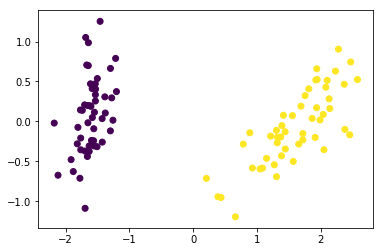

In [8]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_new = []
y_new = []
for i in range(y.shape[0]):
    if y[i] == 2:
        continue
    X_new.append(X[i])
    y_new.append(y[i])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_new)

import matplotlib.pyplot as plt
plt.scatter(X_new[:,0], X_new[:,1], c=y_new)
plt.show()

import numpy as np
X=np.array(X_new, np.float64)
X = np.insert(X, 2, values=np.ones(X.shape[0]), axis=1)
y=np.array(y_new, np.int)

In [2]:
def cost(X, y, beta):
    value = 0
    for i in range(X.shape[0]):
        value = value + (np.log(1+np.exp(beta.T@X[i]))-y[i]*(beta.T@X[i]))
        
    return value

def gradient(X, y, beta):
    vector = np.zeros(beta.shape[0]).T
    for i in range(X.shape[0]):
        vector = vector + (X[i]*(1/(1+np.exp(-(beta.T@X[i])))-y[i]))
    return vector

取\\(\alpha\\)=0.0001，\\(tol\\)=1e-3 以及\\(\beta=[0,0,0]^T\\)，开始迭代，计算一开始的损失值：

In [3]:
alpha = 0.0001
tol = 1e-3
beta = np.array([0,0,0]).T

previousCost = cost(X, y, beta)

更新\\(\beta\\)，并计算新的损失，以及与之前损失的差值：

In [4]:
counter = 0
while(True):
    counter = counter+1;
    beta = beta - alpha*gradient(X, y, beta)
    currentCost = cost(X, y, beta)
    if (previousCost- currentCost)<tol:
        break
    if counter % 1000 == 0: 
        print('-----No.%d-----' % counter);
        print('beta: %s' % beta);
        print('cost1: %s' % previousCost);
        print('cost2: %s' % currentCost);
    previousCost = currentCost

-----No.1000-----
beta: [ 1.94754801 -0.23477967  0.05902566]
cost1: 5.667740732559272
cost2: 5.662921199564655
-----No.2000-----
beta: [ 2.42098168 -0.35792258  0.12321256]
cost1: 3.1445294115744136
cost2: 3.1431957223610376


最终的\\(\beta\\)：

In [5]:
beta

array([ 2.52929319, -0.39071848,  0.14195062])

梯度下降法一共进行了2338次迭代：

In [6]:
counter

2338

所以，最终求得直线\\(\beta^Tx=0\\)，即\\(2.52929319x_1-0.39071848x_2+0.14195062=0\\)，如图中蓝线所示，直线很好地将样本分成了2类：

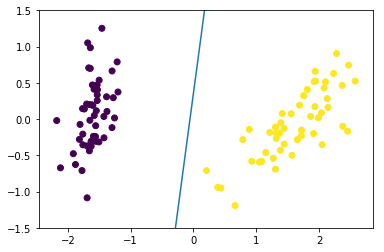

In [16]:
fig, ax = plt.subplots()

lineX1 = np.linspace(X.min(), X.max(), 100)
lineX2 = (2.52929319*lineX1+0.14195062)/0.39071848

ax.plot(lineX1, lineX2)
ax.scatter(X_new[:,0], X_new[:,1], c=y_new)

ax.set_ylim([-1.5, 1.5])
plt.show()